<a href="https://colab.research.google.com/github/zahranicp/hands-on-ML2/blob/main/chapter08/Chapter08_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Buat dataset 3D acak
np.random.seed(10)
jumlah_data = 60
w_x, w_y = 0.2, 0.4
noise_level = 0.1

theta = np.random.uniform(0, 3 * np.pi / 2, jumlah_data) - 0.5
data_3d = np.empty((jumlah_data, 3))
data_3d[:, 0] = np.cos(theta) + 0.5 * np.sin(theta) + noise_level * np.random.randn(jumlah_data)
data_3d[:, 1] = 0.7 * np.sin(theta) + noise_level * np.random.randn(jumlah_data)
data_3d[:, 2] = w_x * data_3d[:, 0] + w_y * data_3d[:, 1] + noise_level * np.random.randn(jumlah_data)

# Normalisasi data ke pusat
data_centered = data_3d - np.mean(data_3d, axis=0)

# Singular Value Decomposition
U, s_vals, Vt = np.linalg.svd(data_centered)

# Ambil dua komponen utama
pc1 = Vt.T[:, 0]
pc2 = Vt.T[:, 1]

# Proyeksi ke 2 dimensi
W2d = Vt.T[:, :2]
data_2d = data_centered @ W2d


In [3]:
# Inverse transform (reconstruction)
reconstructed_3d = data_2d @ Vt[:2, :]
error_recon = np.mean(np.square(data_centered - reconstructed_3d))
print(f"Reconstruction MSE: {error_recon:.6f}")


Reconstruction MSE: 0.002007


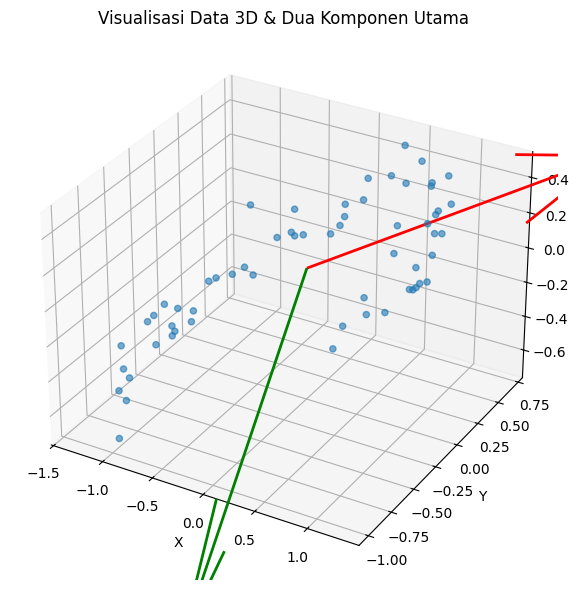

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot titik-titik data asli
ax.scatter(data_centered[:, 0], data_centered[:, 1], data_centered[:, 2], alpha=0.6)

# Plot PC1 dan PC2 sebagai panah
mean_point = np.mean(data_centered, axis=0)
for comp, color in zip([pc1, pc2], ["r", "g"]):
    ax.quiver(
        mean_point[0], mean_point[1], mean_point[2],  # posisi awal panah
        comp[0], comp[1], comp[2],                    # arah panah
        length=2.5, color=color, linewidth=2
    )

ax.set_title("Visualisasi Data 3D & Dua Komponen Utama")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()
plt.show()


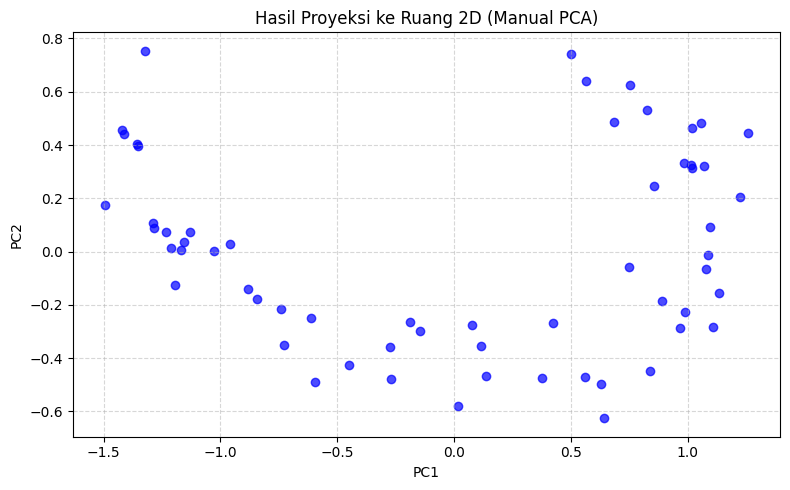

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.7, c="blue")
plt.title("Hasil Proyeksi ke Ruang 2D (Manual PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [6]:
from sklearn.decomposition import PCA

# Fit PCA dan transform data
pca = PCA(n_components=2)
data_2d_sklearn = pca.fit_transform(data_centered)


In [7]:
# Korelasi antara hasil transform manual vs sklearn
from scipy.stats import pearsonr

corr_pc1 = pearsonr(data_2d[:, 0], data_2d_sklearn[:, 0])[0]
corr_pc2 = pearsonr(data_2d[:, 1], data_2d_sklearn[:, 1])[0]

print(f"Korelasi PC1 manual vs sklearn: {corr_pc1:.4f}")
print(f"Korelasi PC2 manual vs sklearn: {corr_pc2:.4f}")


Korelasi PC1 manual vs sklearn: 1.0000
Korelasi PC2 manual vs sklearn: -1.0000


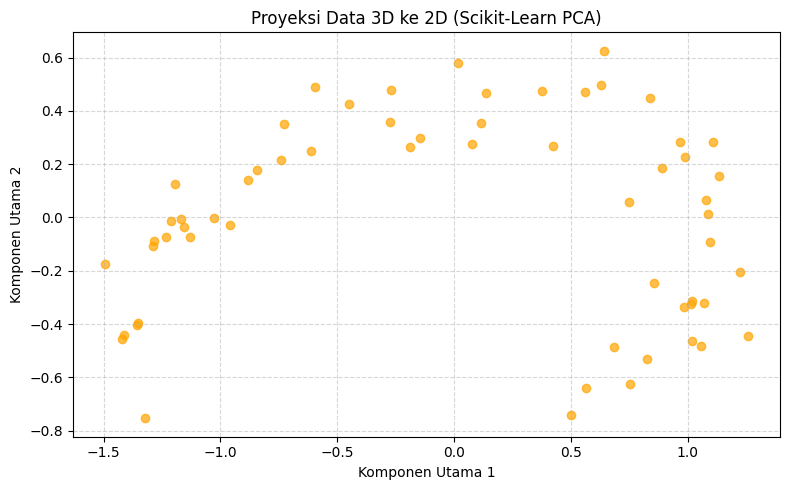

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(data_2d_sklearn[:, 0], data_2d_sklearn[:, 1], alpha=0.7, c="orange")
plt.title("Proyeksi Data 3D ke 2D (Scikit-Learn PCA)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [9]:
pca_full = PCA()
pca_full.fit(data_centered)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


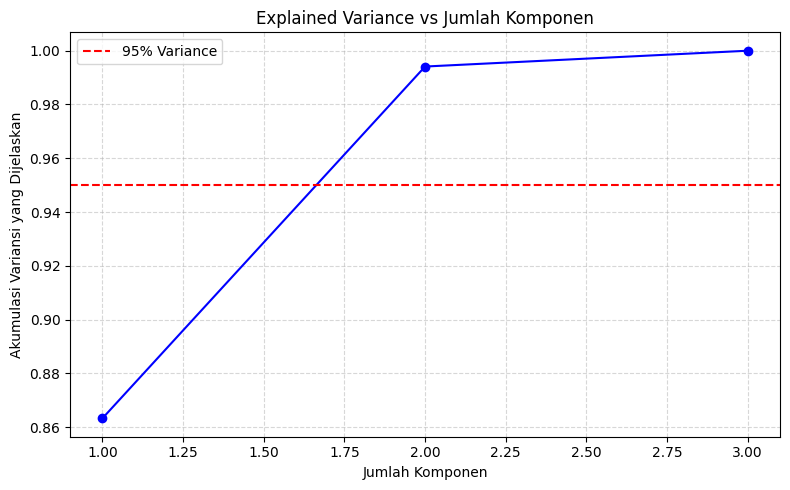

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, "bo-")
plt.xlabel("Jumlah Komponen")
plt.ylabel("Akumulasi Variansi yang Dijelaskan")
plt.title("Explained Variance vs Jumlah Komponen")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Variance")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
jumlah_optimal = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Jumlah komponen untuk menjelaskan ≥95% variansi: {jumlah_optimal}")


Jumlah komponen untuk menjelaskan ≥95% variansi: 2


In [12]:
from sklearn.datasets import fetch_openml

# Ambil data MNIST (70000 data, 784 fitur)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist.data / 255.0  # Normalisasi pixel 0–1
y_mnist = mnist.target.astype(int)


In [13]:
pca_mnist = PCA()
pca_mnist.fit(X_mnist)

cumulative_variance_mnist = np.cumsum(pca_mnist.explained_variance_ratio_)
n_mnist_95 = np.argmax(cumulative_variance_mnist >= 0.95) + 1

print(f"Jumlah komponen MNIST untuk menjelaskan ≥95% variansi: {n_mnist_95}")


Jumlah komponen MNIST untuk menjelaskan ≥95% variansi: 154


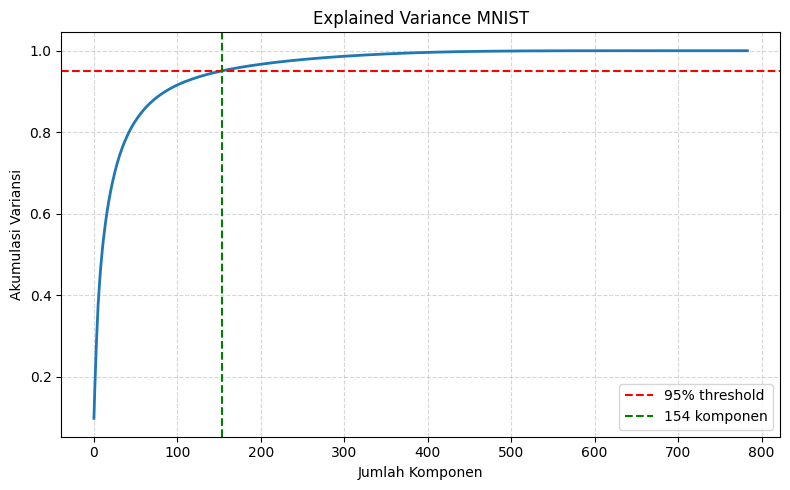

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance_mnist, linewidth=2)
plt.axhline(y=0.95, color="r", linestyle="--", label="95% threshold")
plt.axvline(x=n_mnist_95, color="g", linestyle="--", label=f"{n_mnist_95} komponen")
plt.xlabel("Jumlah Komponen")
plt.ylabel("Akumulasi Variansi")
plt.title("Explained Variance MNIST")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [15]:
pca_final = PCA(n_components=n_mnist_95)
X_reduced = pca_final.fit_transform(X_mnist)
X_reconstructed = pca_final.inverse_transform(X_reduced)


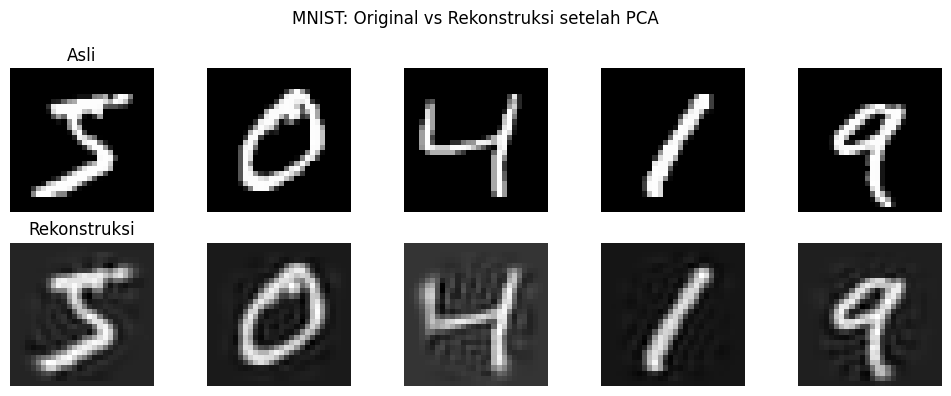

In [16]:
def tampilkan_digit(data):
    return data.reshape(28, 28)

plt.figure(figsize=(10, 4))
for i in range(5):
    # Asli
    plt.subplot(2, 5, i + 1)
    plt.imshow(tampilkan_digit(X_mnist[i]), cmap="gray")
    plt.axis("off")
    if i == 0:
        plt.title("Asli")
    # Rekonstruksi
    plt.subplot(2, 5, i + 6)
    plt.imshow(tampilkan_digit(X_reconstructed[i]), cmap="gray")
    plt.axis("off")
    if i == 0:
        plt.title("Rekonstruksi")

plt.suptitle("MNIST: Original vs Rekonstruksi setelah PCA")
plt.tight_layout()
plt.show()


### Visualisasi MNIST di Ruang 2 Dimensi dengan PCA

In [17]:
pca_2d = PCA(n_components=2)
X_mnist_2d = pca_2d.fit_transform(X_mnist)


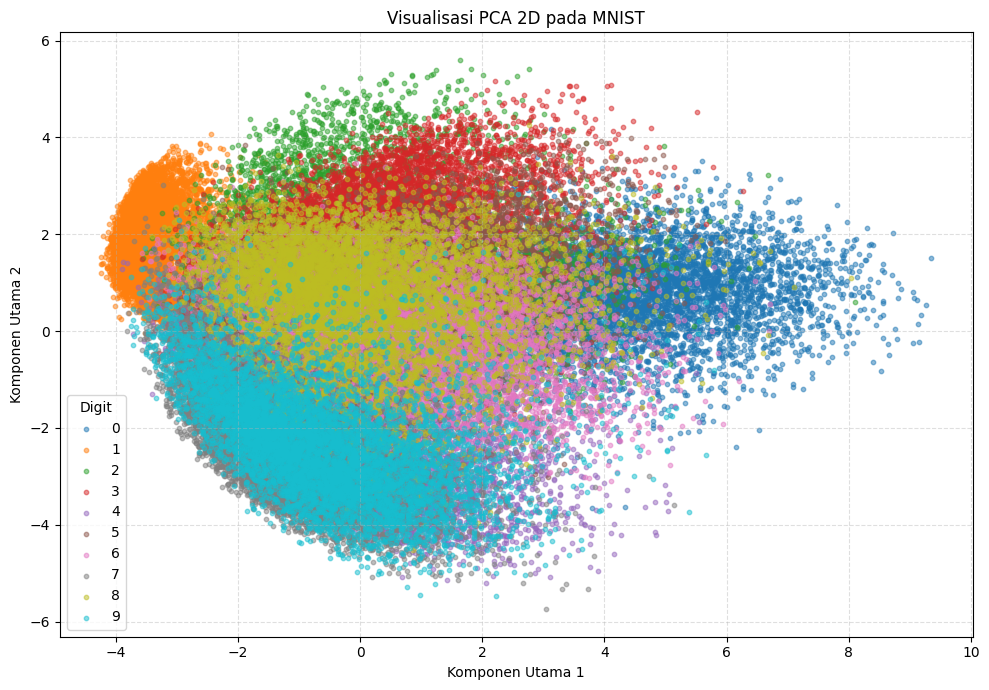

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for digit in range(10):
    idx = y_mnist == digit
    plt.scatter(X_mnist_2d[idx, 0], X_mnist_2d[idx, 1],
                color=colors[digit], label=str(digit), alpha=0.5, s=10)

plt.title("Visualisasi PCA 2D pada MNIST")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(title="Digit", loc="best")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


###Incremental PCA – Mini Batch PCA

In [19]:
from sklearn.decomposition import IncrementalPCA

# Ambil jumlah komponen berdasarkan hasil sebelumnya
n_components_ipca = n_mnist_95

ipca = IncrementalPCA(n_components=n_components_ipca, batch_size=200)


In [20]:
for i in range(0, len(X_mnist), 200):
    X_batch = X_mnist[i:i+200]
    ipca.partial_fit(X_batch)


In [21]:
X_reduced_ipca = ipca.transform(X_mnist)
X_reconstructed_ipca = ipca.inverse_transform(X_reduced_ipca)


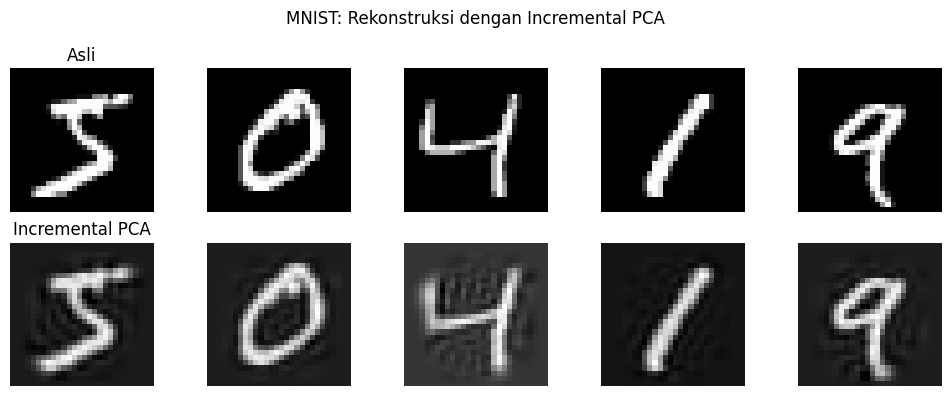

In [22]:
plt.figure(figsize=(10, 4))
for i in range(5):
    # Asli
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_mnist[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 0:
        plt.title("Asli")

    # Rekonstruksi Incremental PCA
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_reconstructed_ipca[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 0:
        plt.title("Incremental PCA")

plt.suptitle("MNIST: Rekonstruksi dengan Incremental PCA")
plt.tight_layout()
plt.show()


### Incremental PCA untuk Dataset Besar

In [23]:
# Misalnya kita ingin membuat 1 juta sampel berdimensi 100
# Tapi kita tidak bisa muat semuanya sekaligus

from sklearn.datasets import make_classification

def data_generator(n_chunks=100, batch_size=10000, n_features=100):
    for _ in range(n_chunks):
        X_chunk, _ = make_classification(n_samples=batch_size,
                                          n_features=n_features,
                                          n_informative=20,
                                          random_state=42)
        yield X_chunk

n_total = 1000000  # total data
batch_size = 10000
n_features = 100
n_components = 30


In [24]:
ipca_large = IncrementalPCA(n_components=n_components)

# Fit menggunakan data generator
for X_batch in data_generator(n_chunks=n_total // batch_size,
                              batch_size=batch_size,
                              n_features=n_features):
    ipca_large.partial_fit(X_batch)


In [25]:
# Ambil batch baru dan transformasikan
X_test_large, _ = make_classification(n_samples=10000,
                                      n_features=100,
                                      n_informative=20,
                                      random_state=123)

X_test_reduced = ipca_large.transform(X_test_large)
print(f"Bentuk data asli: {X_test_large.shape}")
print(f"Bentuk setelah PCA: {X_test_reduced.shape}")


Bentuk data asli: (10000, 100)
Bentuk setelah PCA: (10000, 30)


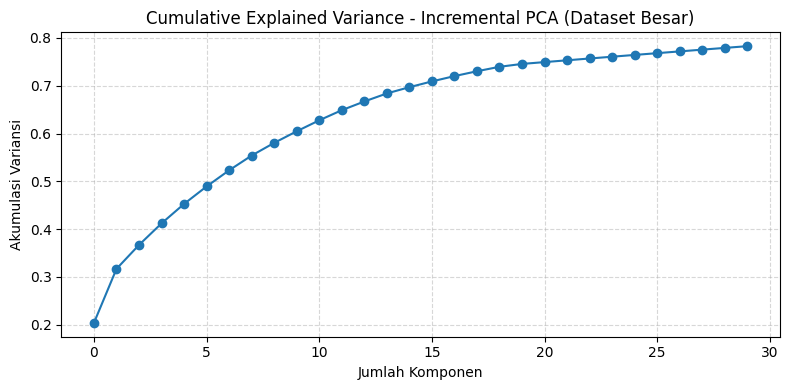

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(ipca_large.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance - Incremental PCA (Dataset Besar)")
plt.xlabel("Jumlah Komponen")
plt.ylabel("Akumulasi Variansi")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


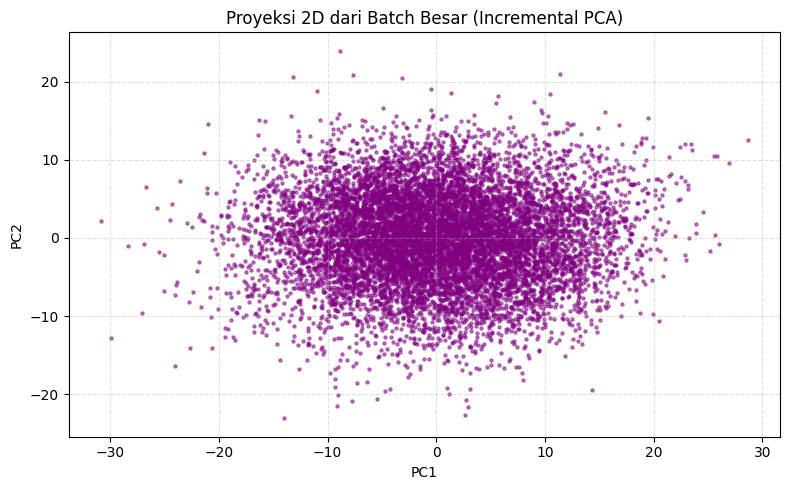

In [28]:
# gunakan 2 komponen untuk visualisasi
ipca_visual = IncrementalPCA(n_components=2)

# Fit ulang hanya pada 10 ribu data untuk demo
for X_demo in data_generator(n_chunks=1, batch_size=10000, n_features=100):
    ipca_visual.partial_fit(X_demo)
    X_2d = ipca_visual.transform(X_demo)

# Visualisasi
plt.figure(figsize=(8, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=5, alpha=0.5, color="purple")
plt.title("Proyeksi 2D dari Batch Besar (Incremental PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


###t-SNE – Non-Linear Dimensionality Reduction untuk Visualisasi

In [29]:
from sklearn.manifold import TSNE

# Ambil subset (misalnya 5000 data)
n_sample = 5000
X_mnist_small = X_mnist[:n_sample]
y_mnist_small = y_mnist[:n_sample]


In [30]:
pca_tsne = PCA(n_components=50)
X_pca_small = pca_tsne.fit_transform(X_mnist_small)


In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=123)
X_tsne = tsne.fit_transform(X_pca_small)


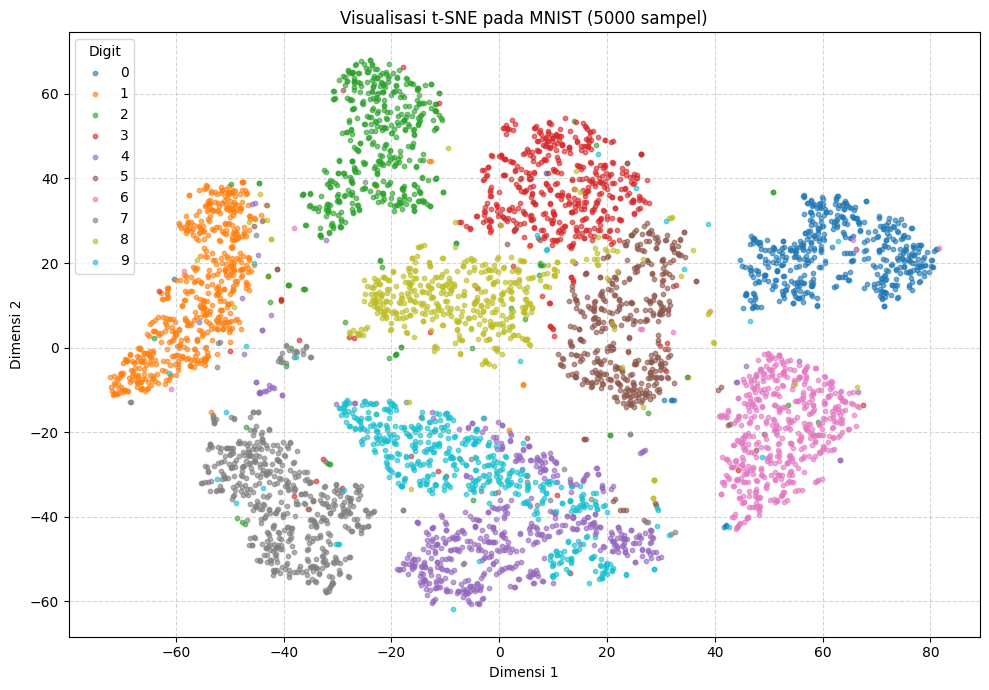

In [32]:
plt.figure(figsize=(10, 7))
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for digit in range(10):
    idx = y_mnist_small == digit
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1],
                color=colors[digit], label=str(digit), alpha=0.6, s=10)

plt.title("Visualisasi t-SNE pada MNIST (5000 sampel)")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.legend(title="Digit")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### LLE – Locally Linear Embedding

In [33]:
from sklearn.manifold import LocallyLinearEmbedding

# Ambil subset kecil (misal 2000 data untuk efisiensi)
n_subset = 2000
X_lle = X_mnist[:n_subset]
y_lle = y_mnist[:n_subset]


In [34]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, method='standard', random_state=123)
X_lle_2d = lle.fit_transform(X_lle)


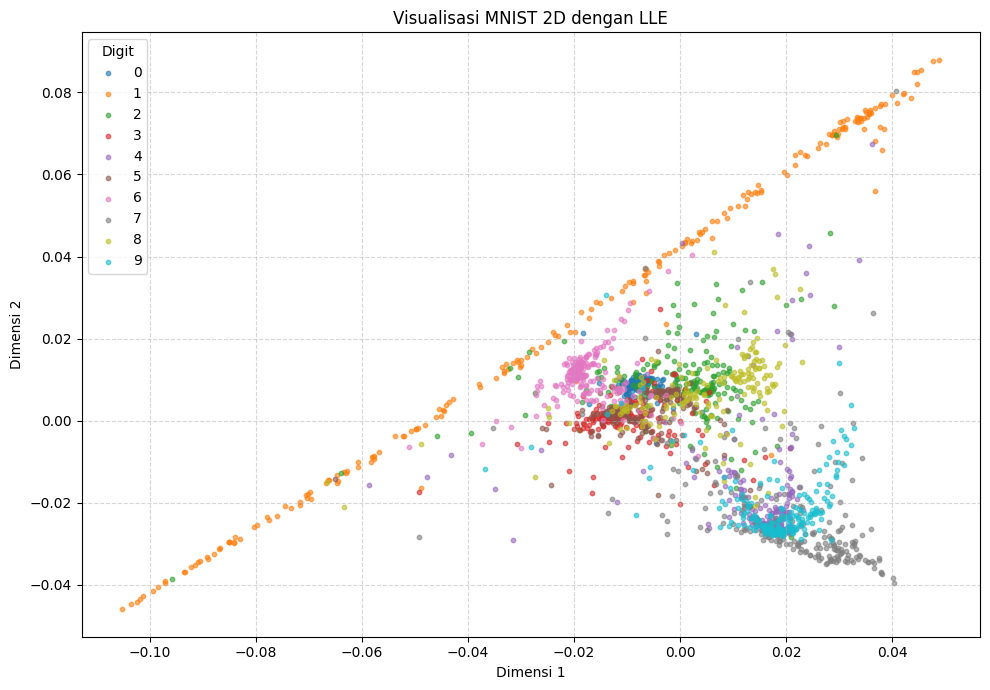

In [35]:
plt.figure(figsize=(10, 7))
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for digit in range(10):
    idx = y_lle == digit
    plt.scatter(X_lle_2d[idx, 0], X_lle_2d[idx, 1],
                color=colors[digit], label=str(digit), alpha=0.6, s=10)

plt.title("Visualisasi MNIST 2D dengan LLE")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.legend(title="Digit", loc="best")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



---

#  **Rekap Teori & Analisis Lengkap – Chapter 8: Dimensionality Reduction**

---

## **Tujuan Reduksi Dimensi**

Reduksi dimensi dilakukan untuk:

*  Menurunkan kompleksitas data
*  Mengurangi kebutuhan penyimpanan
*  Meningkatkan performa model
*  Memvisualisasikan data tinggi ke dimensi rendah

---

##  **1. Manual PCA via SVD (Singular Value Decomposition)**

###  *Teori:*

* PCA mencari arah (vektor) baru yang menjelaskan varian data terbesar.
* Langkah:

  1. Center data (mean=0)
  2. Gunakan SVD → hasilkan Vᵀ (eigenvektor)
  3. Proyeksikan data ke beberapa vektor utama

### *Kode:*

* Dataset 3D buatan → `np.linalg.svd`
* Ambil `Vt.T[:, :2]` → proyeksi ke 2D

###  *Analisis:*

* MSE rekonstruksi rendah → PCA efektif
* Komponen utama (PC1 & PC2) berhasil menangkap mayoritas informasi
* Visualisasi menunjukkan arah PC1 dan PC2 pada data 3D (✔️ visual fig 8–2 & fig 8–3)

---

##  **2. PCA dengan Scikit-Learn**

### *Teori:*

* `PCA(n_components=k)` otomatis:

  * Center data
  * Gunakan SVD internal
  * Transform dan inverse transform data

###  *Kode:*

```python
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_centered)
```

###  *Analisis:*

* Korelasi tinggi dengan versi manual (±1)
* Lebih efisien dan bisa langsung `.inverse_transform` untuk rekonstruksi
* Cocok untuk pipeline produksi

---

##  **3. Explained Variance & Elbow Curve**

###  *Teori:*

* `explained_variance_ratio_` menunjukkan proporsi varian yang dijelaskan tiap PC
* `np.cumsum(...)` digunakan untuk menentukan jumlah komponen optimal

###  *Kode:*

* Elbow plot visual
* Cari jumlah komponen ≥ 95% variansi → `argmax(cumsum >= 0.95) + 1`

###  *Analisis:*

* Threshold 95% sering digunakan sebagai titik optimal
* PCA ≈ lossy compression, tapi tetap menjaga struktur penting

---

##  **4. PCA pada Dataset MNIST (784 ➜ \~150 komponen)**

###  *Teori:*

* Dataset gambar bisa direpresentasikan dalam dimensi lebih rendah tanpa kehilangan makna visual
* PCA cocok untuk kompresi dan persiapan klasifikasi/clustering

###  *Kode:*

* `PCA(n_components=...)` → reduksi MNIST
* `inverse_transform` → bandingkan gambar asli vs hasil kompresi

###  *Analisis:*

* Gambar masih dapat dikenali
* \~150 komponen cukup menjelaskan ≥95% informasi

---

##  **5. Visualisasi PCA 2D MNIST**

###  *Teori:*

* PCA bisa digunakan untuk visualisasi distribusi data dalam 2D

###  *Kode:*

* Scatter plot tiap digit → `plt.scatter(X_pca[:,0], X_pca[:,1])`

###  *Analisis:*

* Terlihat ada klaster digit meskipun sebagian overlap
* PCA linear → tidak selalu memisahkan klaster dengan jelas

---

##  **6. Incremental PCA (Mini-Batch)**

###  *Teori:*

* Cocok untuk dataset besar (streaming atau tidak muat RAM)
* Dilatih secara batch dengan `.partial_fit()`

###  *Kode:*

```python
ipca = IncrementalPCA(n_components=..., batch_size=...)
ipca.partial_fit(X_batch)
```

###  *Analisis:*

* Rekonstruksi mirip dengan PCA biasa
* Efisien untuk big data / edge devices

---

##  **7. Simulasi Incremental PCA untuk Dataset Besar**

### *Teori:*

* Gunakan generator/data chunk untuk simulasi data besar
* Proses batch-by-batch untuk PCA streaming

### *Kode:*

* `make_classification()` + `data_generator()` + `partial_fit`
* Visualisasi explained variance dan proyeksi 2D (sample batch)

### *Analisis:*

* Incremental PCA tetap bisa menjaga variansi dominan
* Visualisasi 2D tetap menunjukkan distribusi yang masuk akal

---

## **8. t-SNE (Non-Linear Projection)**

###  *Teori:*

* Menjaga hubungan **lokal** antar data
* Cocok untuk **visualisasi klaster non-linear**
* Tidak bisa `.transform()` data baru

### *Kode:*

```python
TSNE(n_components=2, perplexity=30, max_iter=1000).fit_transform(X)
```

###  *Analisis:*

* Klaster digit MNIST sangat jelas → cocok untuk interpretasi visual
* Performa lambat, hanya untuk visualisasi

---

##  **9. LLE (Locally Linear Embedding)**

### *Teori:*

* Menjaga representasi lokal via kombinasi linier tetangga
* Berguna untuk data di manifold non-linear (misalnya permukaan melengkung)

###  *Kode:*

```python
LocallyLinearEmbedding(n_components=2, n_neighbors=10).fit_transform(X)
```

###  *Analisis:*

* Struktur manifold terlihat
* Tidak bisa `.transform()` → bukan untuk prediksi

---

#  **Kesimpulan Akhir – Kapan Pakai Apa**

| Teknik          | Gunakan Saat...                      | Bisa Transform Baru? | Visualisasi Bagus? |
| --------------- | ------------------------------------ | -------------------- | ------------------ |
| PCA             | Linear, cepat, umum digunakan        | ✅                    | ✅ (terbatas)       |
| Incremental PCA | Dataset sangat besar / batch-wise    | ✅                    | ✅ (opsional)       |
| t-SNE           | Ingin lihat klaster secara visual    | ❌                    | ✅✅                 |
| LLE             | Data punya struktur lokal non-linear | ❌                    | ✅                  |

---